In [1218]:
import anndata as ad
import numpy as np
import os
import pandas as pd
import scanpy as sc

# Rebuild Adamson 2016 datasets using original files from GEO submission
source: https://ftp.ncbi.nlm.nih.gov/geo/series/GSE90nnn/GSE90546/suppl/GSE90546_RAW.tar

In [1219]:
os.chdir('/work/moccir/data/perturbseq_benchmark_data/adamson_upr_2016')

# Epistasis study

## mtx file

In [1220]:
epistasis_adata = ad.read_mtx('GSM2406677_10X005_matrix.mtx.txt')
epistasis_adata

AnnData object with n_obs × n_vars = 32738 × 15006

#### Matrix is currently genes (as observations) by cells (as variables), but we want cells as observations so transpose

In [1221]:
epistasis_adata = epistasis_adata.T

## genes

In [1222]:
epistasis_genes = pd.read_csv('GSM2406677_10X005_genes.tsv', sep='\t', names=['ensembl_id', 'gene_symbol'])
epistasis_genes

,ensembl_id,gene_symbol
0,ENSG00000243485,MIR1302-10
1,ENSG00000237613,FAM138A
2,ENSG00000186092,OR4F5
3,ENSG00000238009,RP11-34P13.7
4,ENSG00000239945,RP11-34P13.8
...,...,...
32733,ENSG00000215635,AC145205.1
32734,ENSG00000268590,BAGE5
32735,ENSG00000251180,CU459201.1
32736,ENSG00000215616,AC002321.2


## cell barcodes

In [1223]:
epistasis_barcodes = pd.read_csv('GSM2406677_10X005_barcodes.tsv', sep='\t', header=None, index_col=0)
epistasis_barcodes.index.name = 'barcode'
epistasis_barcodes

""
barcode
AAACATACACTCAG-1
AAACATACTCCTAT-1
AAACATTGCAGAGG-1
AAACATTGGCGAAG-1
AAACCGTGATACCG-1
...
TTTGACTGGCTTAG-3
TTTGACTGGGGATG-3
TTTGACTGTGGTCA-3


### add obs_names and var_names

In [1224]:
epistasis_adata.obs_names = epistasis_barcodes.index
epistasis_adata.var_names = epistasis_genes.index

### prepare cell identities data and add 'condition' column

In [1225]:
epistasis_cell_identities = pd.read_csv('GSM2406677_10X005_cell_identities.csv', index_col=0)
epistasis_cell_identities.index.name = 'barcode'
epistasis_cell_identities.columns = [col.replace(' ', '_') for col in epistasis_cell_identities.columns]
epistasis_cell_identities

,guide_identity,read_count,UMI_count,coverage,good_coverage,number_of_cells
barcode,,,,,,
ACGGTATGCTTAGG-3,PERK_IRE1_pMJ154,3907,645,6.057364,True,1
ACAATCCTACCCTC-1,PERK_IRE1_pMJ154,2173,455,4.775824,True,1
ACGAACACGTGCTA-3,ATF6_PERK_IRE1_pMJ158,2093,322,6.500000,True,1
CTGTGAGATTGGTG-1,ATF6_PERK_IRE1_pMJ158,1594,369,4.319783,True,1
ATGTTGCTAATCGC-2,3x_neg_ctrl_pMJ144-2,1537,228,6.741228,True,1
...,...,...,...,...,...,...
CGTAACGAGTTGCA-3,IER3IP1_pDS003,1,1,1.000000,False,0
CCATGCTGGCTTCC-3,ATF6_only_pMJ145,1,1,1.000000,False,0
CCCTCAGAAAAGTG-3,3x_neg_ctrl_pMJ144-2,1,1,1.000000,False,0


In [1226]:
epistasis_cell_identities['condition'] = (
    epistasis_cell_identities['guide_identity']
        .apply(lambda s: s.split('_p')[0])
)
epistasis_cell_identities['condition'].value_counts()

condition
3x_neg_ctrl       3397
ATF6_PERK_IRE1    1711
ATF6_only         1709
IRE1_only         1703
PERK_IRE1         1647
ATF6_PERK         1617
PERK_only         1574
ATF6_IRE1         1462
*                   14
PSMD12               6
PSMA1                4
XBP1                 3
IER3IP1              3
C7orf26              2
Gal4-4(mod)          1
ATF4                 1
YIPF5                1
SNAI1                1
Name: count, dtype: int64

In [1227]:
epistasis_cell_identities

,guide_identity,read_count,UMI_count,coverage,good_coverage,number_of_cells,condition
barcode,,,,,,,
ACGGTATGCTTAGG-3,PERK_IRE1_pMJ154,3907,645,6.057364,True,1,PERK_IRE1
ACAATCCTACCCTC-1,PERK_IRE1_pMJ154,2173,455,4.775824,True,1,PERK_IRE1
ACGAACACGTGCTA-3,ATF6_PERK_IRE1_pMJ158,2093,322,6.500000,True,1,ATF6_PERK_IRE1
CTGTGAGATTGGTG-1,ATF6_PERK_IRE1_pMJ158,1594,369,4.319783,True,1,ATF6_PERK_IRE1
ATGTTGCTAATCGC-2,3x_neg_ctrl_pMJ144-2,1537,228,6.741228,True,1,3x_neg_ctrl
...,...,...,...,...,...,...,...
CGTAACGAGTTGCA-3,IER3IP1_pDS003,1,1,1.000000,False,0,IER3IP1
CCATGCTGGCTTCC-3,ATF6_only_pMJ145,1,1,1.000000,False,0,ATF6_only
CCCTCAGAAAAGTG-3,3x_neg_ctrl_pMJ144-2,1,1,1.000000,False,0,3x_neg_ctrl


### some rows in mtx file do not have entries in cell identities -- create rows with missing information for these so that it can be added as .obs

In [1228]:
epistasis_cell_identities_list = epistasis_cell_identities.index.tolist()
epistasis_missing_barcodes = [x for x in epistasis_adata.obs_names if x not in epistasis_cell_identities_list]
len(epistasis_missing_barcodes)

194

### mismatch between cell_identities.txt and mtx
There are 194 missing barcodes + 14,856 rows in cell_identities.txt = 15,050 but only 15,006 rows in the mtx file. Therefore, there must be rows in cell_identities.txt that do not correspond to rows in mtx.

In [1229]:
barcodes_missing_in_mtx = [x for x in epistasis_cell_identities_list if x not in epistasis_adata.obs_names]
len(barcodes_missing_in_mtx)

44

### 15,050 - 44 = 15,006 so discrepancy resolved, but what are these missing cells?

In [1230]:
epistasis_cell_identities.loc[barcodes_missing_in_mtx]

,guide_identity,read_count,UMI_count,coverage,good_coverage,number_of_cells,condition
barcode,,,,,,,
TGCAAGTGGTTCGA-3,IRE1_only_pMJ148,196,36,5.444444,True,1,IRE1_only
ACGGTCCTGGGCAA-3,PERK_only_pMJ146,107,12,8.916667,True,1,PERK_only
AACGGTACGCGTTA-2,IRE1_only_pMJ148,95,15,6.333333,True,1,IRE1_only
AGTATCCTTGTGCA-2,ATF6_only_pMJ145,93,10,9.300000,True,1,ATF6_only
GTAGCATGATGTGC-3,PERK_IRE1_pMJ154,86,13,6.615385,True,1,PERK_IRE1
ACAGTTCTCAGTTG-2,ATF6_PERK_pMJ150,82,9,9.111111,True,1,ATF6_PERK
TAGATTGAGTTACG-2,ATF6_PERK_pMJ150,79,13,6.076923,True,1,ATF6_PERK
CCACTGTGCGCTAA-2,3x_neg_ctrl_pMJ144-1,78,11,7.090909,True,1,3x_neg_ctrl
TTGCTATGCCTTGC-3,IRE1_only_pMJ148,71,11,6.454545,True,1,IRE1_only


### update cell_identities to remove these missing cells

In [1231]:
epistasis_cell_identities_filtered = epistasis_cell_identities[~epistasis_cell_identities.index.isin(barcodes_missing_in_mtx)]
epistasis_cell_identities_filtered

,guide_identity,read_count,UMI_count,coverage,good_coverage,number_of_cells,condition
barcode,,,,,,,
ACGGTATGCTTAGG-3,PERK_IRE1_pMJ154,3907,645,6.057364,True,1,PERK_IRE1
ACAATCCTACCCTC-1,PERK_IRE1_pMJ154,2173,455,4.775824,True,1,PERK_IRE1
ACGAACACGTGCTA-3,ATF6_PERK_IRE1_pMJ158,2093,322,6.500000,True,1,ATF6_PERK_IRE1
CTGTGAGATTGGTG-1,ATF6_PERK_IRE1_pMJ158,1594,369,4.319783,True,1,ATF6_PERK_IRE1
ATGTTGCTAATCGC-2,3x_neg_ctrl_pMJ144-2,1537,228,6.741228,True,1,3x_neg_ctrl
...,...,...,...,...,...,...,...
CGTAACGAGTTGCA-3,IER3IP1_pDS003,1,1,1.000000,False,0,IER3IP1
CCATGCTGGCTTCC-3,ATF6_only_pMJ145,1,1,1.000000,False,0,ATF6_only
CCCTCAGAAAAGTG-3,3x_neg_ctrl_pMJ144-2,1,1,1.000000,False,0,3x_neg_ctrl


In [1232]:
epistasis_missing_obs = pd.DataFrame({
    'guide_identity': None,
    'read_count': np.nan,
    'UMI_count': np.nan,
    'coverage': np.nan,
    'good_coverage': False,
    'number_of_cells': np.nan,
    'condition': np.nan
}, index=epistasis_missing_barcodes)

### add .obs and .var

In [1233]:
new_epistasis_obs = pd.concat([epistasis_cell_identities_filtered, epistasis_missing_obs])
new_epistasis_obs

,guide_identity,read_count,UMI_count,coverage,good_coverage,number_of_cells,condition
ACGGTATGCTTAGG-3,PERK_IRE1_pMJ154,3907.0,645.0,6.057364,True,1.0,PERK_IRE1
ACAATCCTACCCTC-1,PERK_IRE1_pMJ154,2173.0,455.0,4.775824,True,1.0,PERK_IRE1
ACGAACACGTGCTA-3,ATF6_PERK_IRE1_pMJ158,2093.0,322.0,6.500000,True,1.0,ATF6_PERK_IRE1
CTGTGAGATTGGTG-1,ATF6_PERK_IRE1_pMJ158,1594.0,369.0,4.319783,True,1.0,ATF6_PERK_IRE1
ATGTTGCTAATCGC-2,3x_neg_ctrl_pMJ144-2,1537.0,228.0,6.741228,True,1.0,3x_neg_ctrl
...,...,...,...,...,...,...,...
TATCTGACTCAAGC-3,None,NaN,NaN,NaN,False,NaN,NaN
TCCCAGACGTGTAC-3,None,NaN,NaN,NaN,False,NaN,NaN
TCGTGAGATTGCGA-3,None,NaN,NaN,NaN,False,NaN,NaN
TGGAGACTATGCTG-3,None,NaN,NaN,NaN,False,NaN,NaN


#### To ensure that the new .obs is in the correct order to match the entries in .X, need to reorded it by existing .obs index in the AnnData object that has been created prior to substituting it in.

In [1234]:
new_epistasis_obs = new_epistasis_obs.reindex(epistasis_adata.obs.index)
epistasis_adata.obs = new_epistasis_obs

In [1235]:
epistasis_adata.obs

,guide_identity,read_count,UMI_count,coverage,good_coverage,number_of_cells,condition
barcode,,,,,,,
AAACATACACTCAG-1,3x_neg_ctrl_pMJ144-1,261.0,59.0,4.423729,True,1.0,3x_neg_ctrl
AAACATACTCCTAT-1,3x_neg_ctrl_pMJ144-2,132.0,37.0,3.567568,True,1.0,3x_neg_ctrl
AAACATTGCAGAGG-1,3x_neg_ctrl_pMJ144-2,560.0,117.0,4.786325,True,1.0,3x_neg_ctrl
AAACATTGGCGAAG-1,ATF6_PERK_IRE1_pMJ158,215.0,49.0,4.387755,True,1.0,ATF6_PERK_IRE1
AAACCGTGATACCG-1,ATF6_PERK_pMJ150,567.0,124.0,4.572581,True,1.0,ATF6_PERK
...,...,...,...,...,...,...,...
TTTGACTGGCTTAG-3,PERK_only_pMJ146,215.0,60.0,3.583333,True,1.0,PERK_only
TTTGACTGGGGATG-3,PERK_IRE1_pMJ154,64.0,16.0,4.000000,True,1.0,PERK_IRE1
TTTGACTGTGGTCA-3,3x_neg_ctrl_pMJ144-1,218.0,43.0,5.069767,True,1.0,3x_neg_ctrl


In [1236]:
epistasis_adata.var = epistasis_genes

In [1237]:
epistasis_adata.var

,ensembl_id,gene_symbol
0,ENSG00000243485,MIR1302-10
1,ENSG00000237613,FAM138A
2,ENSG00000186092,OR4F5
3,ENSG00000238009,RP11-34P13.7
4,ENSG00000239945,RP11-34P13.8
...,...,...
32733,ENSG00000215635,AC145205.1
32734,ENSG00000268590,BAGE5
32735,ENSG00000251180,CU459201.1
32736,ENSG00000215616,AC002321.2


## add basic QC metrics

In [1238]:
# mitochondrial genes, "MT-" for human, "Mt-" for mouse
epistasis_adata.var["mt"] = epistasis_adata.var['gene_symbol'].str.startswith("MT-")
# ribosomal genes
epistasis_adata.var["ribo"] = epistasis_adata.var['gene_symbol'].str.startswith(("RPS", "RPL"))
# hemoglobin genes
epistasis_adata.var["hb"] = epistasis_adata.var['gene_symbol'].str.contains("^HB[^(P)]")

In [1239]:
sc.pp.calculate_qc_metrics(
    epistasis_adata, qc_vars=["mt", "ribo", "hb"], inplace=True, log1p=True
)

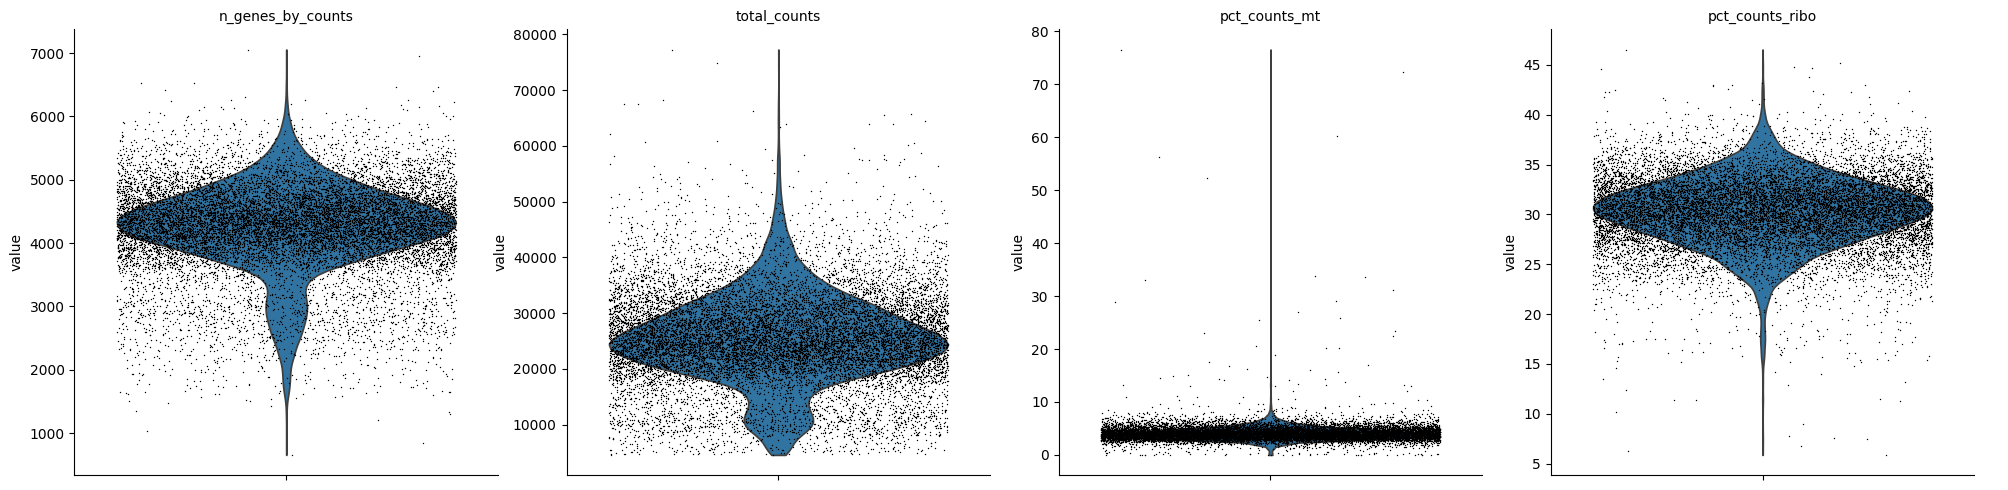

In [1240]:
sc.pl.violin(
    epistasis_adata,
    ["n_genes_by_counts", "total_counts", "pct_counts_mt", "pct_counts_ribo"],
    jitter=0.4,
    multi_panel=True,
)

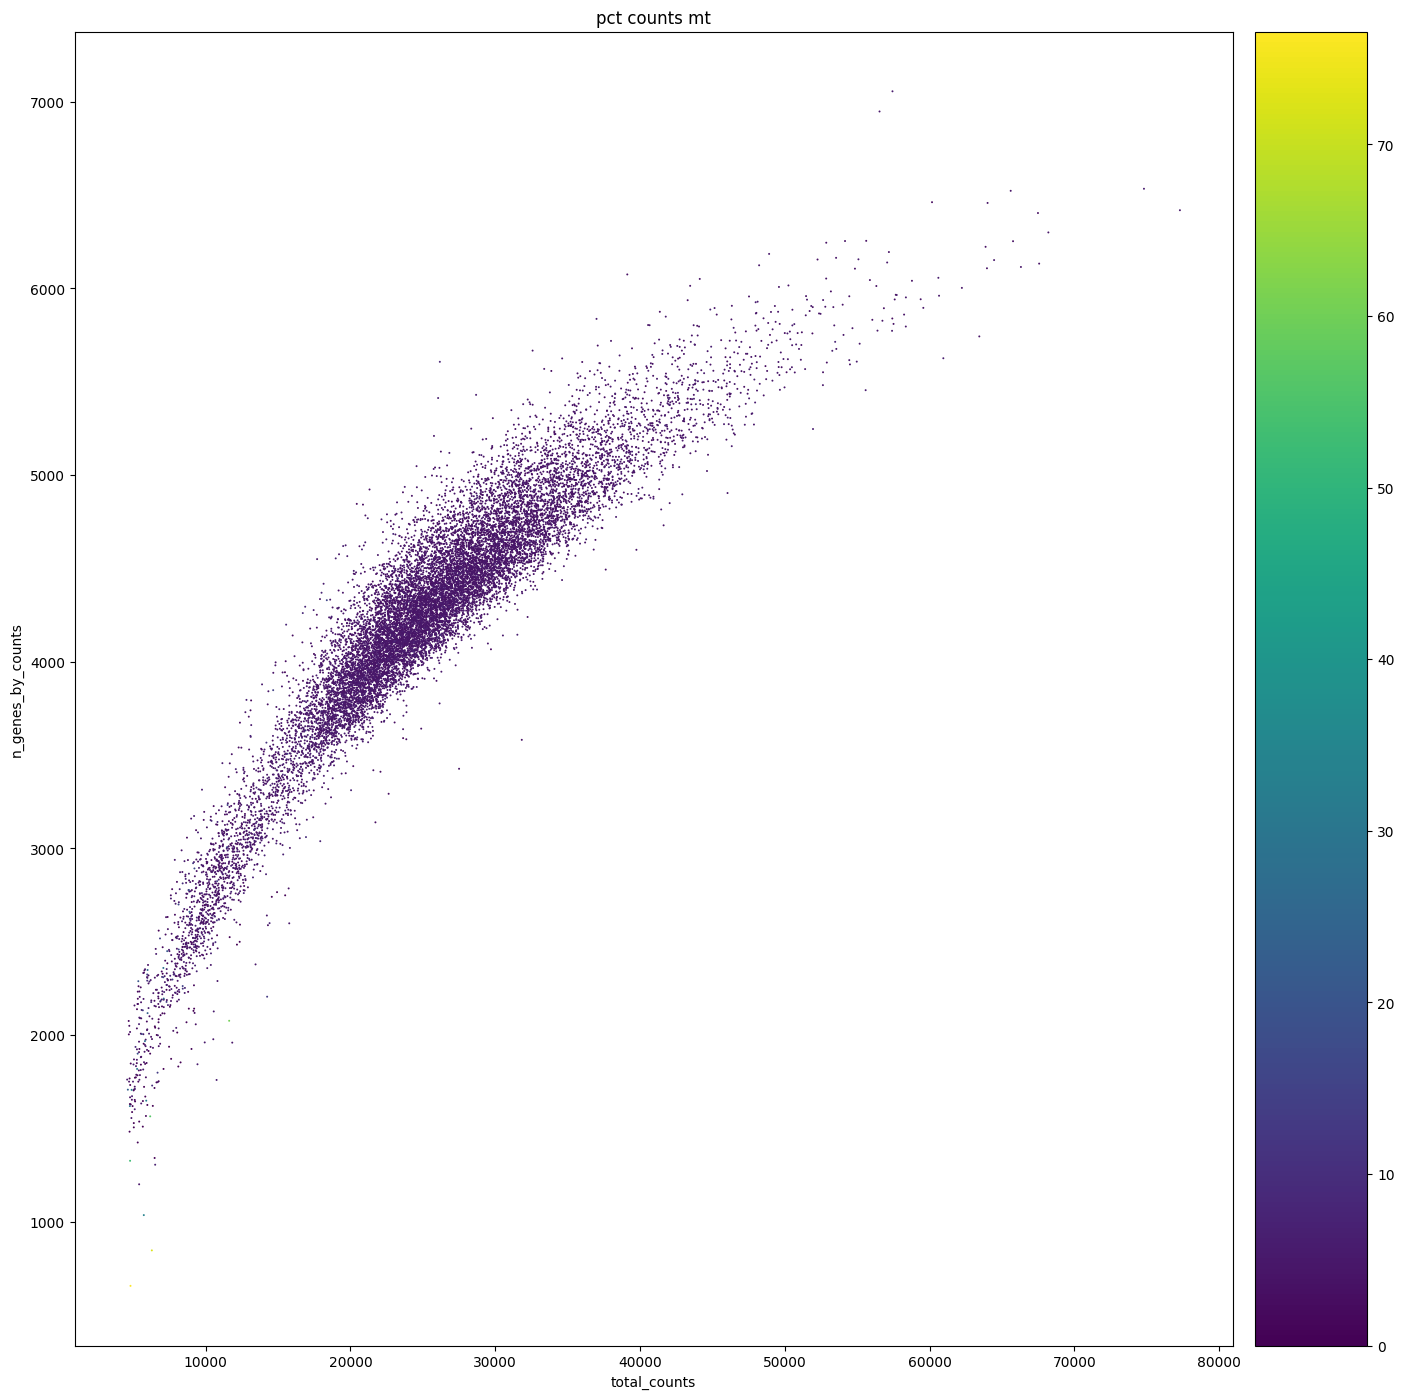

In [1241]:
sc.pl.scatter(epistasis_adata, "total_counts", "n_genes_by_counts", color="pct_counts_mt")

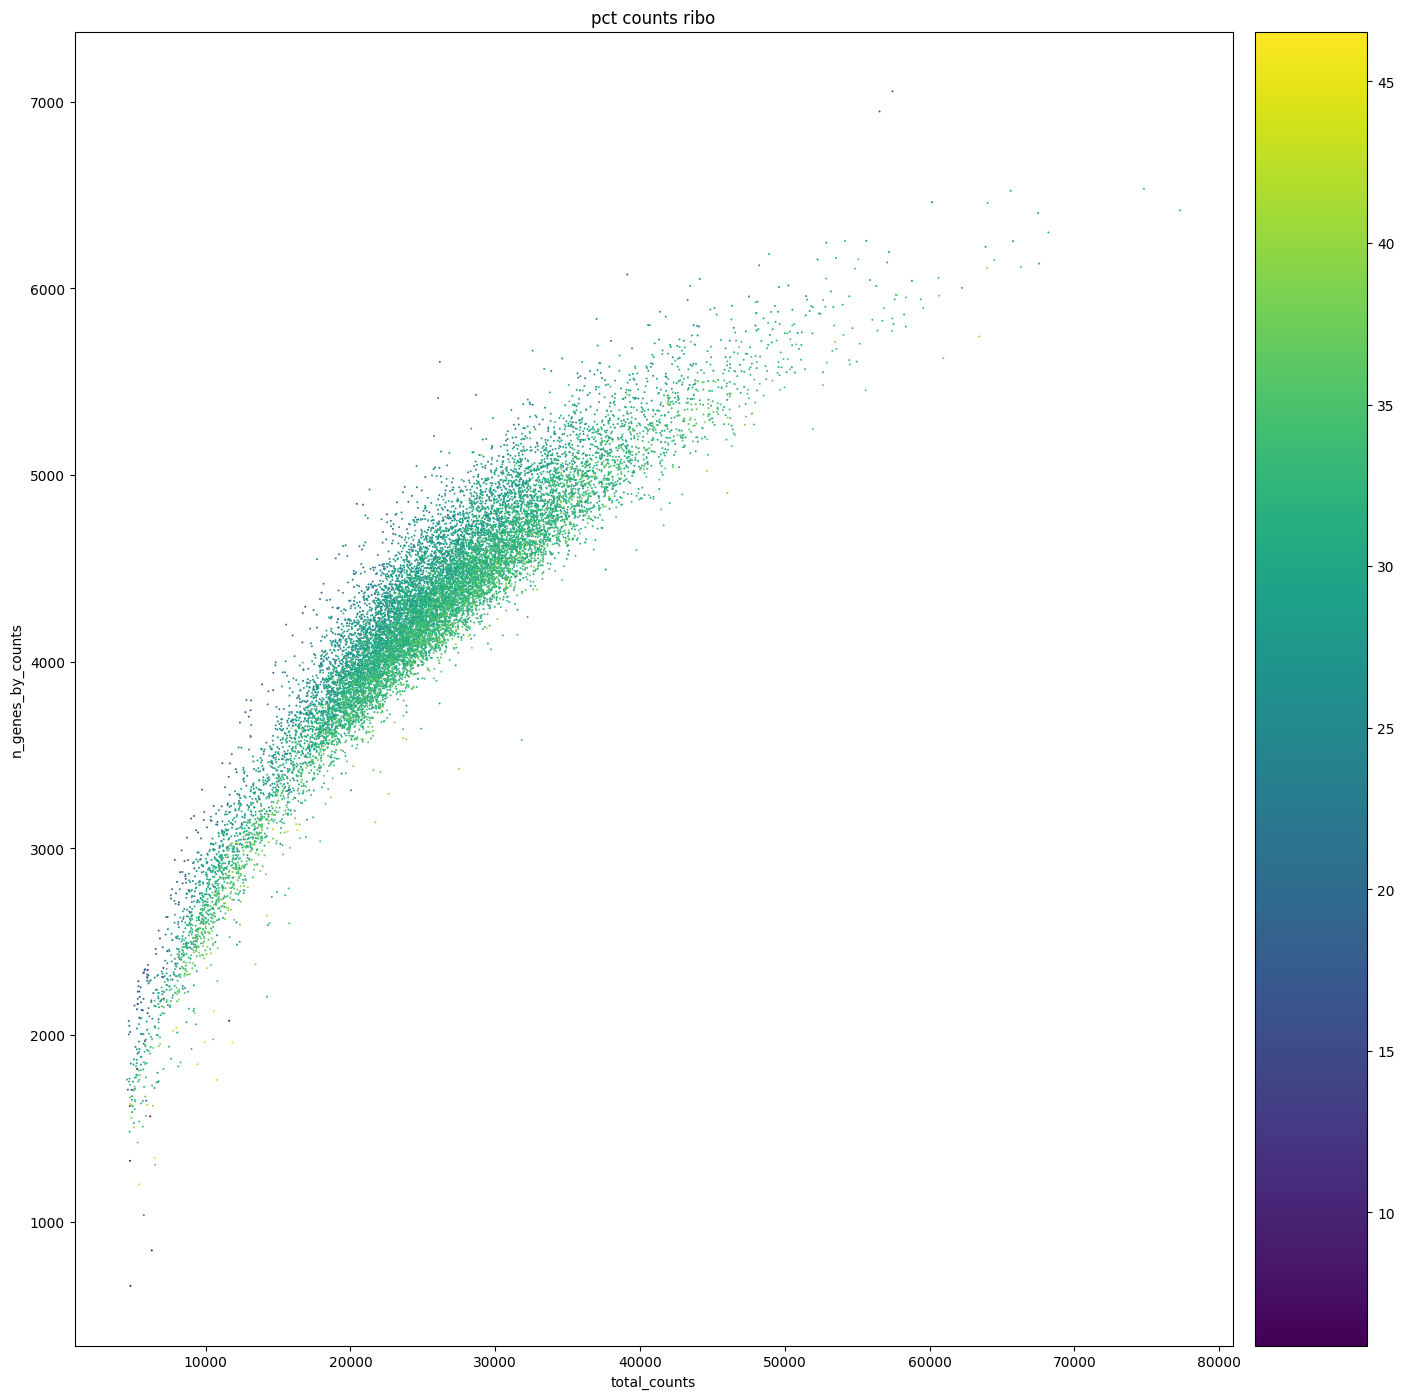

In [1242]:
sc.pl.scatter(epistasis_adata, "total_counts", "n_genes_by_counts", color="pct_counts_ribo")

In [1243]:
epistasis_adata

AnnData object with n_obs × n_vars = 15006 × 32738
    obs: 'guide_identity', 'read_count', 'UMI_count', 'coverage', 'good_coverage', 'number_of_cells', 'condition', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb'
    var: 'ensembl_id', 'gene_symbol', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'

In [1244]:
epistasis_adata.write('adamson_2016_epistasis_from_source.h5ad')